## Линейные модели. Часть 2

In [65]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

%matplotlib inline

plt.style.use(['seaborn', 'seaborn-talk'])

### Генерация данных

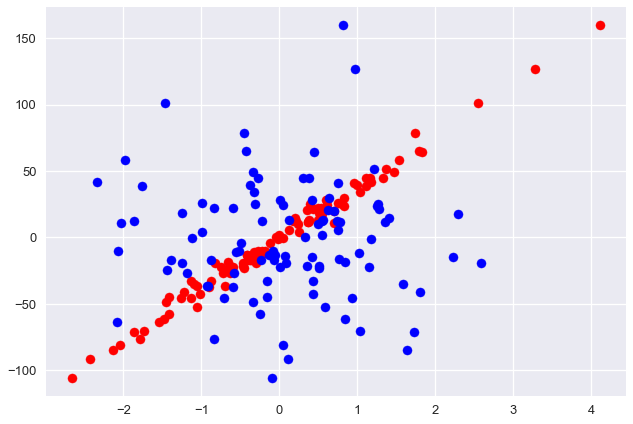

In [66]:
data, target, coef = datasets.make_regression(n_features=2, n_informative=1, n_targets=1,
                                              noise=5., coef=True, random_state=2)

plt.scatter(data[:, 0], target, color='r')
plt.scatter(data[:, 1], target, color='b')
plt.show()

In [67]:
train_data, test_data, train_label, test_label = model_selection.train_test_split(data,
                                                                                  target,
                                                                                  test_size=0.3,
                                                                                  random_state=0)

### LinearRegression

In [68]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_label)

prediction = linear_regressor.predict(test_data)

mean = metrics.mean_absolute_error(test_label, prediction)
print(f'Средняя абсолютная ошибка: {mean:.2f}')
print()

lin_coef = linear_regressor.coef_
inter = linear_regressor.intercept_
print(f'Формула Базовая:   \tw_1*{coef[0]:.2f} + w_2*{coef[1]:.2f}')
print(f'Формула Полученная:\tw_1*{lin_coef[0]:.2f} + w_2*{lin_coef[1]:.2f} + {inter:.2f}')

Средняя абсолютная ошибка: 4.22

Формула Базовая:   	w_1*38.08 + w_2*0.00
Формула Полученная:	w_1*38.81 + w_2*0.65 + -0.72


In [69]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target,
                                                 scoring='neg_mean_absolute_error',
                                                 cv=10)

print(f'Ridge mean: {linear_scoring.mean():.2f},',
      f'min-max: {linear_scoring.min():.2f} ... {linear_scoring.max():.2f},',
      f'std: {linear_scoring.std():.5f}')

Ridge mean: -4.07, min-max: -6.35 ... -2.79, std: 1.07371


In [70]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=True)

In [71]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target,
                                                 scoring=scorer, cv=10)

print(f'Linear mean: {linear_scoring.mean():.2f},',
      f'min-max: {linear_scoring.min():.2f} ... {linear_scoring.max():.2f},',
      f'std: {linear_scoring.std():.5f}')

Linear mean: 4.07, min-max: 2.79 ... 6.35, std: 1.07371


### Lasso

In [72]:
lasso_regressor = linear_model.Lasso(random_state=3)
lasso_regressor.fit(train_data, train_label)
lasso_prediction = lasso_regressor.predict(test_data)

mean = metrics.mean_absolute_error(test_label, lasso_prediction)
print(f'Средняя абсолютная ошибка: {mean:.2f}')
print()

lasso_coef = lasso_regressor.coef_
inter = lasso_regressor.intercept_
print(f'Формула Базовая:   \tw_1*{coef[0]:.2f} + w_2*{coef[1]:.2f}')
print(f'Формула Полученная:\tw_1*{lasso_coef[0]:.2f} + w_2*{lasso_coef[1]:.2f} + {inter:.2f}')
print()

lasso_scoring = model_selection.cross_val_score(lasso_regressor, data, target,
                                                scoring=scorer, cv=10)

print(f'Lasso mean: {lasso_scoring.mean():.2f},',
      f'min-max: {lasso_scoring.min():.2f} ... {lasso_scoring.max():.2f},',
      f'std: {lasso_scoring.std():.5f}')

Средняя абсолютная ошибка: 3.89

Формула Базовая:   	w_1*38.08 + w_2*0.00
Формула Полученная:	w_1*37.85 + w_2*0.00 + -0.78

Lasso mean: 4.15, min-max: 2.88 ... 6.07, std: 1.01704
